In [270]:
import LowLevelFEM as FEM
using LowLevelFEM
using SparseArrays
using Plots

gmsh.initialize()

In [271]:
gmsh.open("wave_propagation_1D.geo")

Info    : Reading 'wave_propagation_1D.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00029931s, CPU 0.000221s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00126701s, CPU 0.001192s)
Info    : 1000 nodes 1111 elements
Info    : Done reading 'wave_propagation_1D.geo'


In [272]:
mat = FEM.material("body", E=1.0, ν=0.0)
problem = FEM.Problem([mat], type="PlaneStress")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 20)


LowLevelFEM.Problem("wave_propagation_1D", "PlaneStress", 2, [("body", 1.0, 0.0, 7.85e-9)], 1.0, 1000)

In [273]:
supp = FEM.displacementConstraint("supp", ux=0)
load = FEM.load("supp", fx=0);

In [274]:
dof = problem.non * problem.dim
u0 = zeros(dof)
v0 = zeros(dof);

In [275]:
K = FEM.stiffnessMatrix(problem)
M = FEM.massMatrix(problem)
f = FEM.loadVector(problem, [load])
C = spzeros(dof, dof)
dof

2000

In [276]:
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp]);

In [277]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

0.000281166240093584

In [278]:
FEM.initialDisplacement!(problem, "supp", u0, ux=0)
FEM.initialVelocity!(problem, "body", v0, vx=1000)
FEM.initialVelocity!(problem, "supp", v0, vx=0)

In [279]:
α = -0.1
δ = 0.1

0.1

In [280]:
#u1, v1, t1 = FEM.CDM(K, M, C, f, u0, v0, 100Tₘᵢₙ, Tₘᵢₙ / π)
u1, v1, t1 = FEM.HHT(K, M, f, u0, v0, 100Tₘᵢₙ, Tₘᵢₙ / π, α=α, δ=δ)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 3.265750695574925e-13 3.384893050180252e-13; … ; 0.0 0.08949799388291309 … -7.336653591539946 -7.2401124381681; 0.0 1.448989903452019e-18 … 5.13475654106485e-13 5.520535612959916e-13], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.520385689790949e-10 1.1464251258192873e-10; … ; 1000.0 1000.0 … 1156.3549616931189 1001.0467148438131; 0.0 3.211278192811755e-14 … 6.852884296931585e-10 1.789187094665813e-10], [0.0, 8.949799388291309e-5, 0.00017899598776582618, 0.00026849398164873926, 0.00035799197553165236, 0.00044748996941456546, 0.0005369879632974785, 0.0006264859571803916, 0.0007159839510633046, 0.0008054819449462177  …  0.02729688813428863, 0.027386386128171545, 0.02747588412205446, 0.027565382115937374, 0.027654880109820288, 0.027744378103703202, 0.027833876097586117, 0.02792337409146903, 0.028012872085351945, 0.02810237007923486])

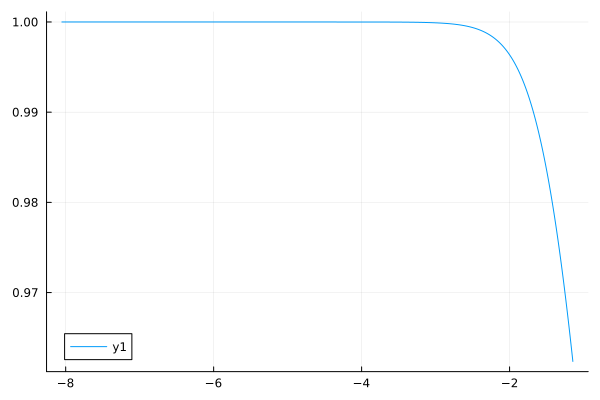

In [281]:
plt = FEM.HHTaccuracyAnalysis(Tₘᵢₙ, Tₘᵢₙ / π, "spectralRadius", n=1000, α=α, δ=δ)

plot(plt)

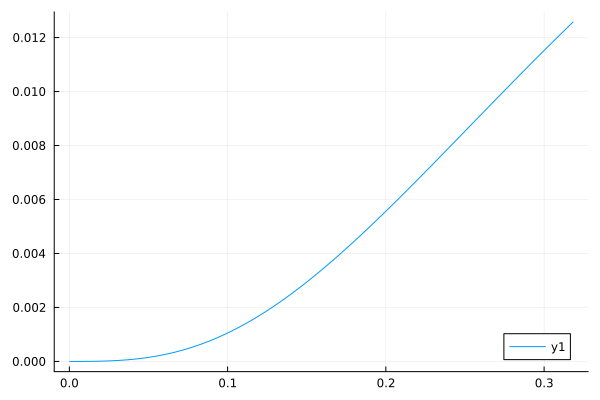

In [282]:
plt = FEM.HHTaccuracyAnalysis(Tₘᵢₙ, Tₘᵢₙ / π, "dampingCharacter", n=1000, α=α, δ=δ)

plot(plt)

In [283]:
S = FEM.solveStress(problem, u1)

LowLevelFEM.StressField([[0.0 1.3877787807814457e-17 … -0.0069132864759620105 -0.006912124214667692; 0.0 6.938893903907228e-18 … -4.884981308350689e-15 -4.440892098500626e-15; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.3877787807814457e-17 … -0.006913286475901614 -0.0069121242147147655; 0.0 0.0 … -6.661338147750939e-15 -3.197442310920451e-14; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -1.2440970431914543e-17 … -0.006913286475910085 -0.006912124214694738; 0.0 -6.938893903907228e-18 … 1.7763568394002505e-15 7.993605777301127e-15; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 6.17316364472151e-17 … -0.006913286475886277 -0.006912124214673709; 0.0 6.938893903907228e-18 … 3.375077994860476e-14 1.9539925233402755e-14; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 -4.929066601530056e-17 … -0.006913286475932462 -0.006912124214724335; 0.0 0.0 … -2.4424906541753444e-14 -6.217248937900877e-15; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.436817375899889e-18 … -0.0069132864758

In [284]:
sx = FEM.showStressResults(problem, S, "sx", name="σx(t)", t=t1, visible=false, smooth=true)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


0

In [285]:
ph = FEM.plotOnPath(problem, "path", sx, 500, visible=true)

1

In [286]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.12.2
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.6.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [287]:
gmsh.finalize()